# **Linear Regression** 

In [1]:
import numpy as np 

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

In [3]:
# https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb#scrollTo=vjNGNZjB07Wz
!apt-get update -qq
!apt-get install fonts-nanum* -qq 

zsh:1: command not found: apt-get
zsh:1: no matches found: fonts-nanum*


In [ ]:

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name() 
plt.rc('font', family=font_name) 

fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
# 핸즈온 머신러닝 p.160 
np.random.seed(160)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
plt.plot(X, y, 'b.')
plt.xlim(0., 2.0)
plt.ylim(0, 14)
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]

In [ ]:
# 핸즈온 머신러닝 p.160 
eta = 0.1 
n_iterations = 1000 
m = 100 

theta = np.random.randn(2, 1) 

for iteration in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients 

In [ ]:
our_theta = theta.copy() 
theta

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
y_predict

In [ ]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Learning Rate 

In [ ]:
# 핸즈온 머신러닝 p.160 
eta = 0.02 
n_iterations = 15 
m = 100 

theta = np.random.randn(2, 1) 
theta = np.expand_dims(theta, axis=0)

for iteration in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta[iteration]) - y)
    new_theta = theta[iteration] - eta * gradients 
    new_theta = np.expand_dims(new_theta, axis=0)
    theta = np.vstack((theta, new_theta))

for th in theta: 
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    y_predict = X_new_b.dot(th)
    y_predict
    plt.plot(X_new, y_predict, 'r-')

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# 핸즈온 머신러닝 p.160 
eta = 0.10
n_iterations = 15 
m = 100 

theta = np.random.randn(2, 1) 
theta = np.expand_dims(theta, axis=0)

for iteration in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta[iteration]) - y)
    new_theta = theta[iteration] - eta * gradients 
    new_theta = np.expand_dims(new_theta, axis=0)
    theta = np.vstack((theta, new_theta))

for th in theta: 
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    y_predict = X_new_b.dot(th)
    y_predict
    plt.plot(X_new, y_predict, 'r-')

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# 핸즈온 머신러닝 p.160 
eta = 0.3
n_iterations = 15 
m = 100 

theta = np.random.randn(2, 1) 
theta = np.expand_dims(theta, axis=0)

for iteration in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta[iteration]) - y)
    new_theta = theta[iteration] - eta * gradients 
    new_theta = np.expand_dims(new_theta, axis=0)
    theta = np.vstack((theta, new_theta))

for th in theta: 
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    y_predict = X_new_b.dot(th)
    y_predict
    plt.plot(X_new, y_predict, 'r-')

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

**Scikit-learn Linear Regression** 

In [ ]:
# 핸즈온 머신러닝 p.162 
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg.intercept_, lin_reg.coef_

In [ ]:
our_theta

In [ ]:
plt.plot(X_new, lin_reg.predict(X_new), 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

**Logistic Regression** 

핸즈 온 머신러닝 p.197 

붓꽃 데이터셋 

*   3개의 품종(Iris-Setosa[0], Iris-Versicolor[1], Iris-Virginica[2]) 

*   150개 samples

*   꽃받침의 길이[0], 꽃받침의 너비[1], 꽃잎의 길이[2], 꽃잎의 너비[3] (4개 features) 

꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기 

In [ ]:
from sklearn import datasets 
iris = datasets.load_iris() 
list(iris.keys())

In [ ]:
iris['target_names']

In [ ]:
iris['feature_names']

In [ ]:
X = iris['data'][:, 3:] # 꽃잎의 너비 
y = (iris['target'] == 2).astype(np.int)    # 1 Iris-Virginica면 1, 그렇지 않으면 0 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

In [ ]:
decision_boundary

In [ ]:
log_reg.predict([[1.7], [1.5]])

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1), )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

**Softmax Regression** 

꽃잎의 길이와 꽃잎의 너비를 기반으로 분류

In [ ]:
X = iris['data'][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비 
y = iris['target']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]]).round(2)

# **Support Vector Machine (SVM)**

참고자료

https://nbviewer.jupyter.org/github/rickiepark/handson-ml2/blob/master/05_support_vector_machines.ipynb

**선형 SVM 분류** 

핸즈 온 머신러닝 p.205 ~ 

SVM 분류기를 클래스 사이에 가장 폭이 넓은 도로를 찾는 것으로 생각할 수 있음. 

Large margin classification 

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
# SVM 분류 모델


In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=250, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

결정 경계는 경계에 위치한 샘플에 의해 전적으로 결정(또는 의지). 

이러한 샘플을 Support vector 

핸즈 온 머신러닝 p.206 ~ 

모든 샘플이 도로(결정 경계) 바깥쪽에 올바르게 분류되어 있으면 Hard margin classification 


문제점 
- 데이터가 선형적으로 구분될 수 있어야 제대로 작동 
- 이상치에 민감

In [ ]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "불가능!", fontsize=24, color="red")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

#save_fig("sensitivity_to_outliers_plot")
plt.show()

좀 더 유연한 모델 필요! 

도로 폭을 최대한 넓게 유지하는 것과 

Margin violation(sample이 도로 중간이나 반대쪽에 있는 경우 등) 사이에서 균형 잡기 

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

꽃잎 길이 5.5cm, 꽃잎 너비 1.7cm 

[1] -> Iris Versicolor

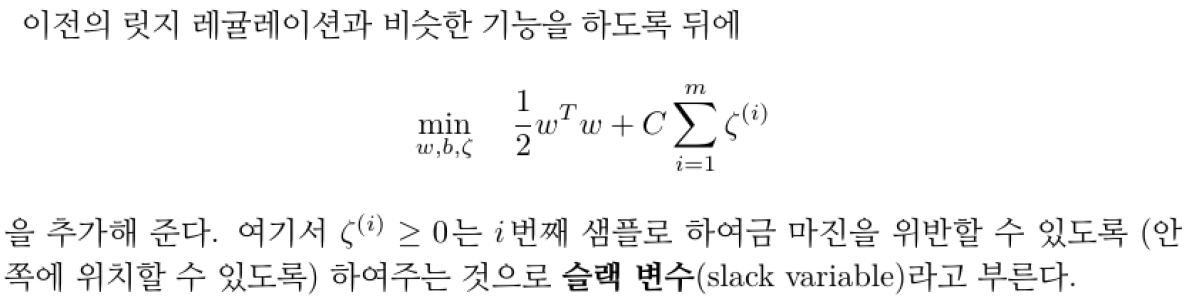

[8강] 서포트벡터머신.pdf p.17 

In [ ]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

In [ ]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

#save_fig("regularization_plot")

Margin violation은 일반적으로 적은 것이 좋음 

위의 경우에는 왼쪽 모델에 Margin violation이 많지만 일반화가 더 잘 될 것 같은? 

**비선형 SVM 분류** 

핸즈 온 머신러닝 p.209 ~ 

비선형 데이터셋을 다루는 한 가지 방법은 

(4장에서처럼) 다항 특성과 같은 특성을 더 추가 

In [ ]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

#save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

x_2 = (x_1)^2 을 추가하여 선형적으로 구분 가능 

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

**다항식 커널** 

핸즈 온 머신러닝 p.211 ~ 

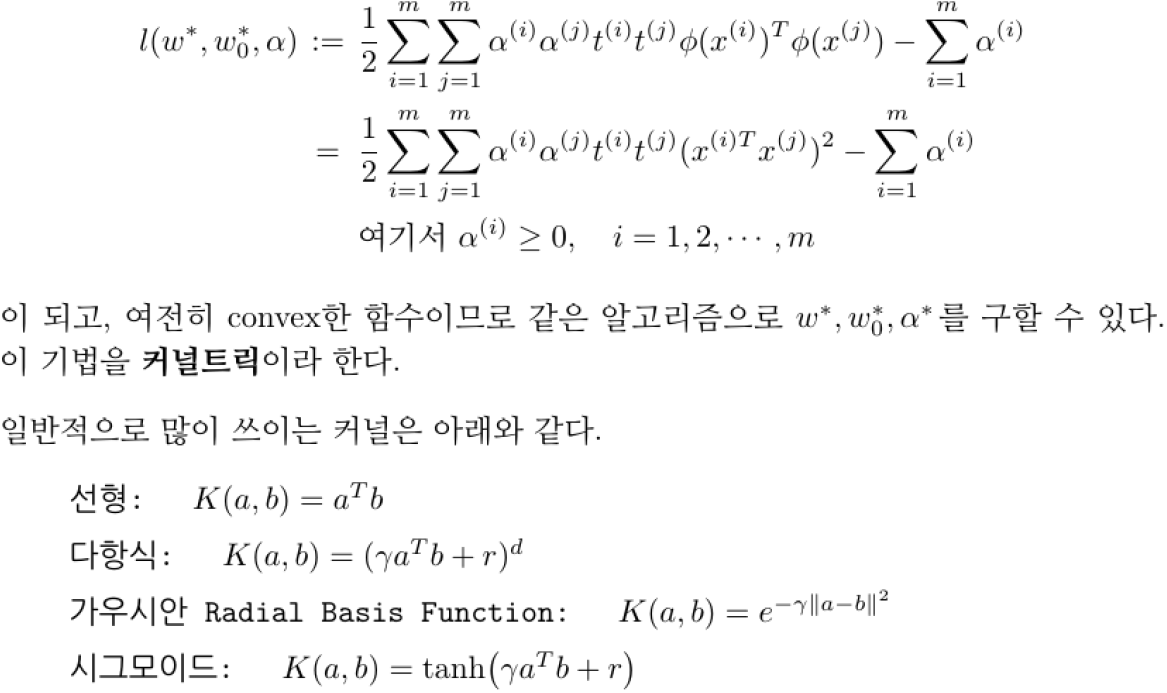

[9강] 서포트벡터머신 심화.pdf p.19 

다항식 특성을 추가하는 것은 모든 머신러닝 알고리즘에서 잘 작동 

하지만 차수가 낮은 다항식은 (복잡한) 데이터셋 표현력이 낮고, 
높은 차수의 다항식은 모델 처리 속도를 느리게 만듦 

SVM 사용할 땐 Kernel trick 적용 가능 

Kernel trick은 실제로 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과 얻을 수 있음 

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

#save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

**온라인 SVM** 

핸즈 온 머신러닝 p.226 ~ 

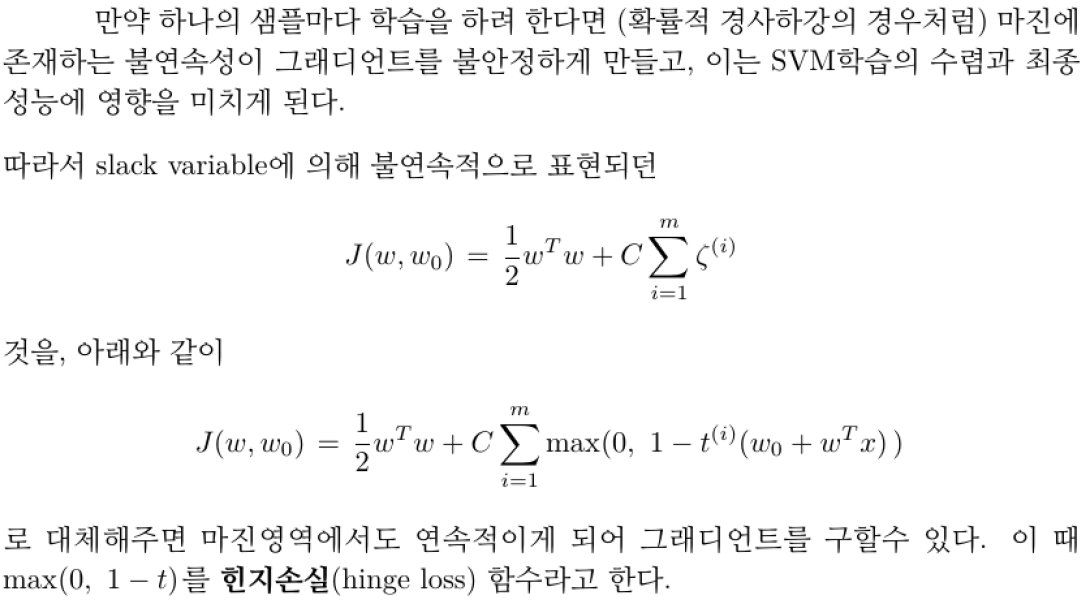

[9강] 서포트벡터머신 심화.pdf p.21 

선형 SVM 분류기 비용 함수 p. 227 

In [ ]:
class Linear_SVM_Classifier():
    def __init__(self, C=1):
        self.theta1n = None 
        self.theta0 = None 
        self.losses = []

        self.C = C 

        self.intercept_ = None 
        self.coef_ = None 

        self.support_vectors_ = None 
        
    def fit(self, x, y, epochs=10000, eta=0.001):
        self.theta1n = np.ones((x.shape[1], 1)) # (x.shape[1], 1)
        self.theta0 = 0

        m = len(x) 
        t = y * 2 - 1 # t = -1 if y == 0, t = +1 if y == 1 
        x_t = x * t # element-wise  

        for _ in range(epochs):
            support_vectors_idx = (x_t.dot(self.theta1n) + t * self.theta0 < 1).ravel()
            x_t_sv = x_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]
            
            # 손실 값 계산 
            loss = 1/2 * np.sum(self.theta1n * self.theta1n) + self.C * (np.sum(1 - x_t_sv.dot(self.theta1n)) - self.theta0 * np.sum(t_sv))
            self.losses.append(loss)

            # gradient 계산 
            theta1n_grad = self.theta1n - self.C * np.sum(x_t_sv, axis=0).reshape(-1, 1)
            theta0_grad = -C * np.sum(t_sv)
                
            # 업데이트 
            self.theta1n -= eta * theta1n_grad
            self.theta0 -= eta * theta0_grad 

        self.intercept_ = np.array([self.theta0])
        self.coef_ = np.array([self.theta1n]) 

        support_vectors_idx = (x_t.dot(self.theta1n) + t * self.theta0 < 1).ravel()
        self.support_vectors_ = x[support_vectors_idx]

    def decision_function(self, x):
        return x.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, x):
        return (self.decision_function(x) >= 0).astype(np.float64) 

In [ ]:
# 훈련 세트
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica

In [ ]:
C = 2
epochs = 30000 
linear_svm_clf = Linear_SVM_Classifier(C=C) 
linear_svm_clf.fit(X, y, epochs=epochs, eta=0.001)
print(linear_svm_clf.intercept_, linear_svm_clf.coef_) 

yr = y.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(linear_svm_clf, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 넓이", fontsize=14)
plt.title("Our Linear_SVM_Classifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")

svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(range(epochs), linear_svm_clf.losses)
plt.axis([0, epochs, 0, 100])

In [ ]:
interval_size = 200 
slices = [linear_svm_clf.losses[i] for i in range(0, epochs, interval_size)]
plt.plot(range(epochs//interval_size), slices )
plt.axis([0, epochs//interval_size, 0, 100])